# SoftMax and Sigmoid with temperature

## The effect of temperature on SoftMax

We divide every value of the input distribution by a temperature $\tau$.

If $\tau \gt 1.0$ then we smooth out the distribution and the values get closer to each other, increasong the entropy of the distribution.

If $\tau \lt 1.0$ then we make the distribution more uneven and the values are stretched out further apart. This reduces the entropy of the distribution, since there's a clear *high* value in the distribution that stands out relative to the others - i.e. its probability after the softmax is significantly higher than the rest of the values.

## Links
* https://stats.stackexchange.com/questions/527080/what-is-the-role-of-temperature-in-softmax

In [73]:
import torch
from torch import nn
from torch.nn import functional as F
from matplotlib import pyplot as plt

Input Tensor: tensor([0.1081, 0.4376, 0.7697, 0.1929, 0.3626, 2.8451])

Temperature: 0.1,  Tensor: tensor([ 1.0810,  4.3756,  7.6969,  1.9291,  3.6258, 28.4511])
Temperature: 0.1, Softmax: tensor([1.2982e-12, 3.5007e-11, 9.6953e-10, 3.0316e-12, 1.6539e-11, 1.0000e+00])

Temperature: 0.5,  Tensor: tensor([0.2162, 0.8751, 1.5394, 0.3858, 0.7252, 5.6902])
Temperature: 0.5, Softmax: tensor([0.0040, 0.0078, 0.0151, 0.0048, 0.0067, 0.9615])

Temperature: 1.0,  Tensor: tensor([0.1081, 0.4376, 0.7697, 0.1929, 0.3626, 2.8451])
Temperature: 1.0, Softmax: tensor([0.0452, 0.0628, 0.0875, 0.0491, 0.0582, 0.6972])

Temperature: 5.0,  Tensor: tensor([0.0216, 0.0875, 0.1539, 0.0386, 0.0725, 0.5690])
Temperature: 5.0, Softmax: tensor([0.1427, 0.1524, 0.1629, 0.1451, 0.1502, 0.2467])

Temperature: 10.0,  Tensor: tensor([0.0108, 0.0438, 0.0770, 0.0193, 0.0363, 0.2845])
Temperature: 10.0, Softmax: tensor([0.1550, 0.1602, 0.1656, 0.1563, 0.1590, 0.2038])

Temperature: 20.0,  Tensor: tensor([0.0054, 0.0219,

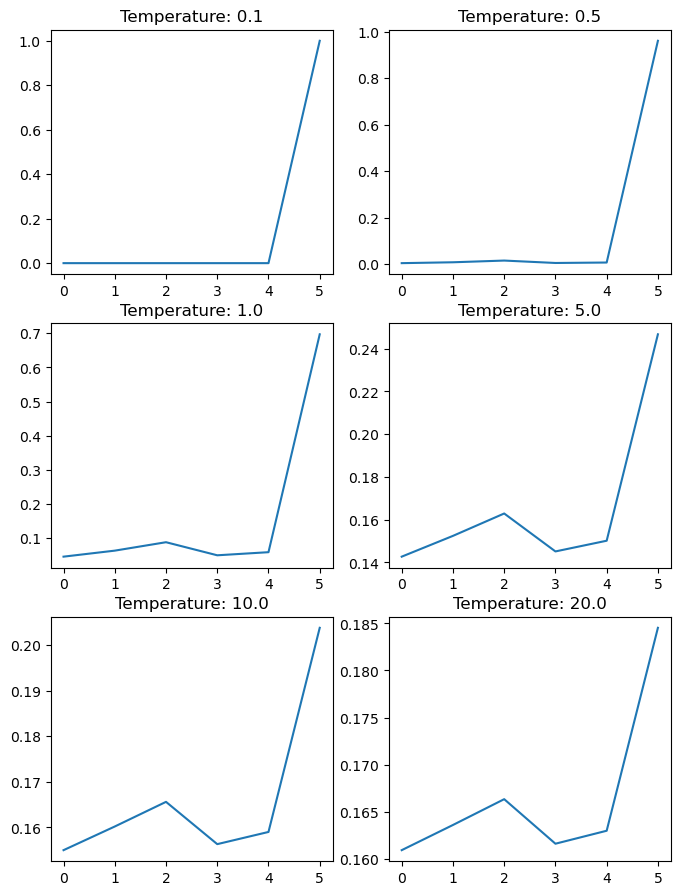

In [74]:
torch.manual_seed(21)
x = torch.randn(6).abs()

temperatures = [0.1, 0.5, 1.0, 5.0, 10.0, 20.0]

def softmax_with_temperature(x, temperatures):
    print(f"Input Tensor: {x}")
    nrows = (len(temperatures) + 1) // 2
    ncols = 2
    fig = plt.figure(figsize=(ncols * 4, nrows * 3.6))

    for i, t in enumerate(temperatures):
        _x = x / t
        print(f"\nTemperature: {t},  Tensor: {_x}")
        print(f"Temperature: {t}, Softmax: {F.softmax(_x, dim=0)}")
        
        plt.subplot(nrows, ncols, i + 1)
        plt.plot(F.softmax(_x, dim=0))
        plt.title(f"Temperature: {t}")
    # end for
    
    plt.show()
# end def

softmax_with_temperature(x, temperatures)

# print(x)
# print(F.softmax(x, dim=0))

# The effect of temperature on Sigmoid

From the graphs below we can see that as the temperature $\tau$ takes lower values, the Sigmoid function returns values closer and closer to 0.0 and 1.0 since we're artifically stretching out the values away from 0.0. When the temperature $\tau$ takes greater values, we compress the values, and hence, the Sigmoid function returns values closer and closer to 0.0.

tl;dr As the temperature $\tau$ takes on smaller values, more of our input distribution is mapped to values closer to 0.0 and 1.0 by the Sigmoid function.

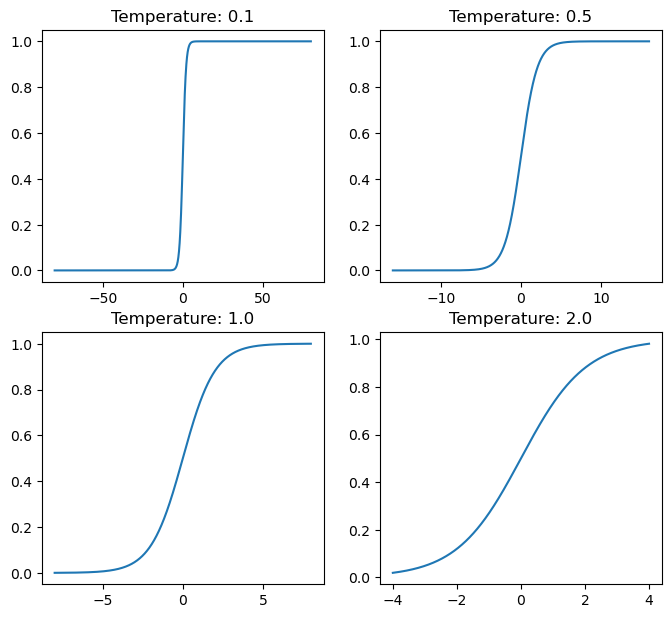

In [75]:
def plot_with_temperatures(x, temperatures):
    nrows = (len(temperatures) + 1) // 2
    ncols = 2
    fig = plt.figure(figsize=(ncols * 4, nrows * 3.6))
    for i, t in enumerate(temperatures):
        plt.subplot(nrows, ncols, i + 1)
        _x = x / t
        plt.plot(_x, _x.sigmoid())
        plt.title(f"Temperature: {t}")
    # end for
    plt.show()
# end def

x = torch.tensor(list(range(-800, 800))) / 100.0
plot_with_temperatures(x, [0.1, 0.5, 1.0, 2.0])